**MELCHIZEDEK ACKAH-BLAY**

December 5, 2024

**Olympic Athlestes Data Exploration**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

*load dataset*

In [2]:
df = pd.read_csv(r'/Users/melki/Desktop/dataset_olympics.csv')

*look at sample data*

In [4]:
df.sample(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
47735,24615,Matthew D'Aquino,M,23.0,165.0,62.0,Australia,AUS,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Extra-Lightweight,NaN
50972,26203,"Jozef Christian ""Jos"" De Jong",M,32.0,NaN,NaN,Belgium,BEL,1952 Summer,1952,Summer,Helsinki,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",NaN
48960,25232,Gsta Danielson,M,18.0,NaN,NaN,Sweden,SWE,1908 Summer,1908,Summer,London,Athletics,Athletics Men's 800 metres,NaN
16283,8749,"Alexander ""Alex"" Baumann",M,20.0,189.0,80.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN


*getting basic info about dataframe*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


*looking at summary statistics of numerical columns*

In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


*looking for null values*

In [7]:
df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

*looking at the shape of the data*

In [8]:
df.shape

(70000, 15)

*looking at if any data is duplicated*

In [9]:
df.duplicated().sum()

383

*dropping duplicates*

In [11]:
df.drop_duplicates(inplace = True)

*looking at the new shape of the data*

In [13]:
df.shape

(69617, 15)

*making columns lower case to be easy to work with*

In [17]:
df.columns = df.columns.str.lower()

*remove unkown age from the data*

In [21]:
df['age'].dropna(inplace = True)

*verfiying...*

In [22]:
df['age'].isna().sum()

2671

*perform routine data analysis*

*analyzing **age distribution***

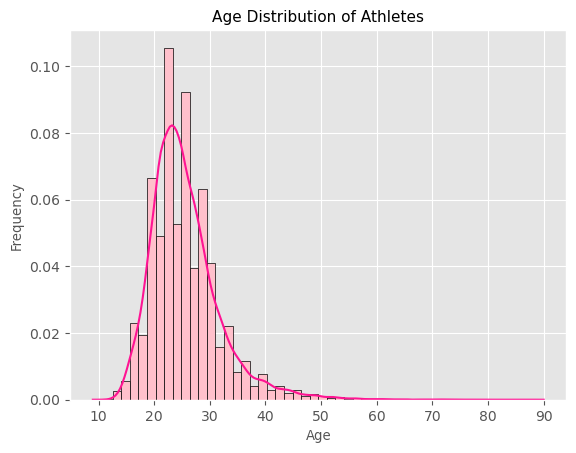

In [33]:
plt.hist(df['age'], bins = 50, density = True, color = 'pink', edgecolor = 'black')
sns.kdeplot(df['age'], color = 'deeppink', linewidth = 1.5)
plt.title('Age Distribution of Athletes', fontsize = 11)
plt.xlabel('Age', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*analyzing height distribution*

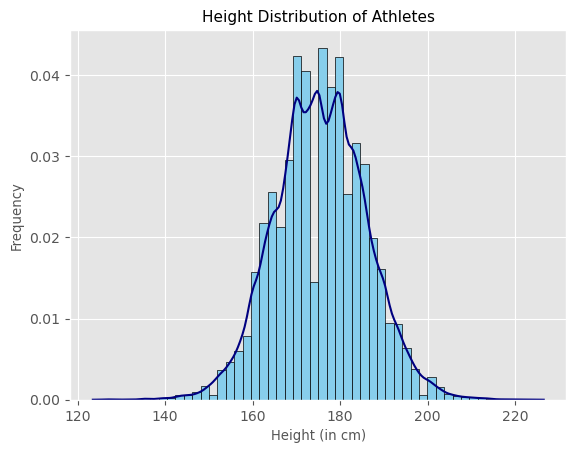

In [49]:
plt.hist(df['height'], bins = 50, density = True, color = 'skyblue', edgecolor = 'black')
sns.kdeplot(df['height'], color = 'navy', linewidth = 1.5)
plt.title('Height Distribution of Athletes', fontsize = 11)
plt.xlabel('Height (in cm)', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*analyzing weight distribution of athletes*

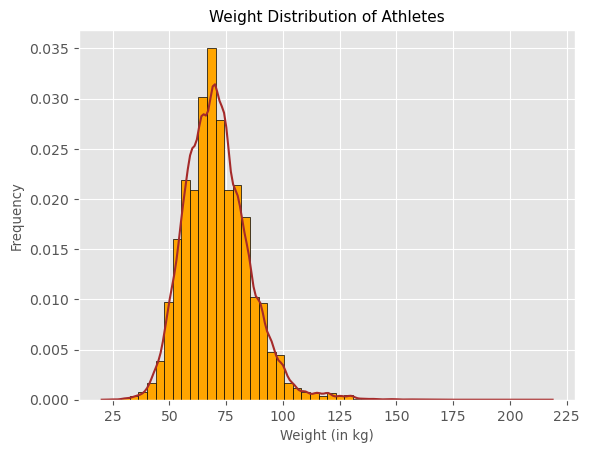

In [54]:
plt.hist(df['weight'], bins = 50, density = True, color = 'orange', edgecolor = 'black')
sns.kdeplot(df['weight'], color = 'brown', linewidth = 1.5)
plt.title('Weight Distribution of Athletes', fontsize = 11)
plt.xlabel('Weight (in kg)', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*analyzing gender distribution*

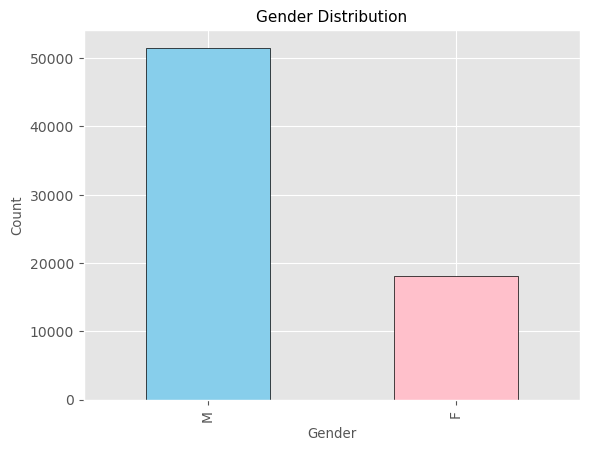

In [38]:
df['sex'].value_counts().plot(kind = 'bar', color = ['skyblue', 'pink'], edgecolor = 'black')
plt.title('Gender Distribution', fontsize = 11)
plt.xlabel('Gender', fontsize = 9.5)
plt.ylabel('Count', fontsize = 9.5)
plt.show()

*year and age analysis*

In [57]:
year_age = df.groupby('year')['age'].mean().sort_values(ascending = False)
year_age.head(10)

year
1932    29.606987
1920    29.241135
1900    29.119883
1948    28.363170
1924    28.252267
1928    27.973564
1912    27.965552
1936    27.245665
1904    27.063241
1908    27.000000
Name: age, dtype: float64

*maximum heights over the year*

In [62]:
max_heights = df.groupby('year')['height'].max()
max_heights.head(10)

year
1896    188.0
1900    188.0
1904    188.0
1906    195.0
1908    191.0
1912    200.0
1920    193.0
1924    189.0
1928    198.0
1932    193.0
Name: height, dtype: float64

*analyzing average weights based on **sport** and **gender***

In [70]:
sport_gender_weights_average = df.groupby(['sport', 'sex'])['weight'].mean().sort_values(ascending = False)
sport_gender_weights_average.head(10)

sport             sex
Tug-Of-War        M      93.090909
Basketball        M      91.173979
Rugby Sevens      M      90.555556
Bobsleigh         M      89.593561
Beach Volleyball  M      88.820513
Handball          M      88.772443
Water Polo        M      87.584973
Volleyball        M      87.021277
Baseball          M      86.308219
Art Competitions  M      86.000000
Name: weight, dtype: float64

*looking at only **basketball***

In [74]:
sport_gender_weights_average['Basketball']

sex
M    91.173979
F    73.523659
Name: weight, dtype: float64

*looking at the weights for female beach volleyball players*

In [76]:
sport_gender_weights_average['Beach Volleyball']['F']

69.3157894736842

*analyzing number of unique events per sport*

In [79]:
unique_events = df.groupby('sport')['event'].nunique().sort_values(ascending = False)
unique_events.head(10)

sport
Athletics           83
Shooting            81
Swimming            54
Cycling             42
Sailing             37
Wrestling           29
Art Competitions    28
Canoeing            27
Gymnastics          26
Rowing              25
Name: event, dtype: int64

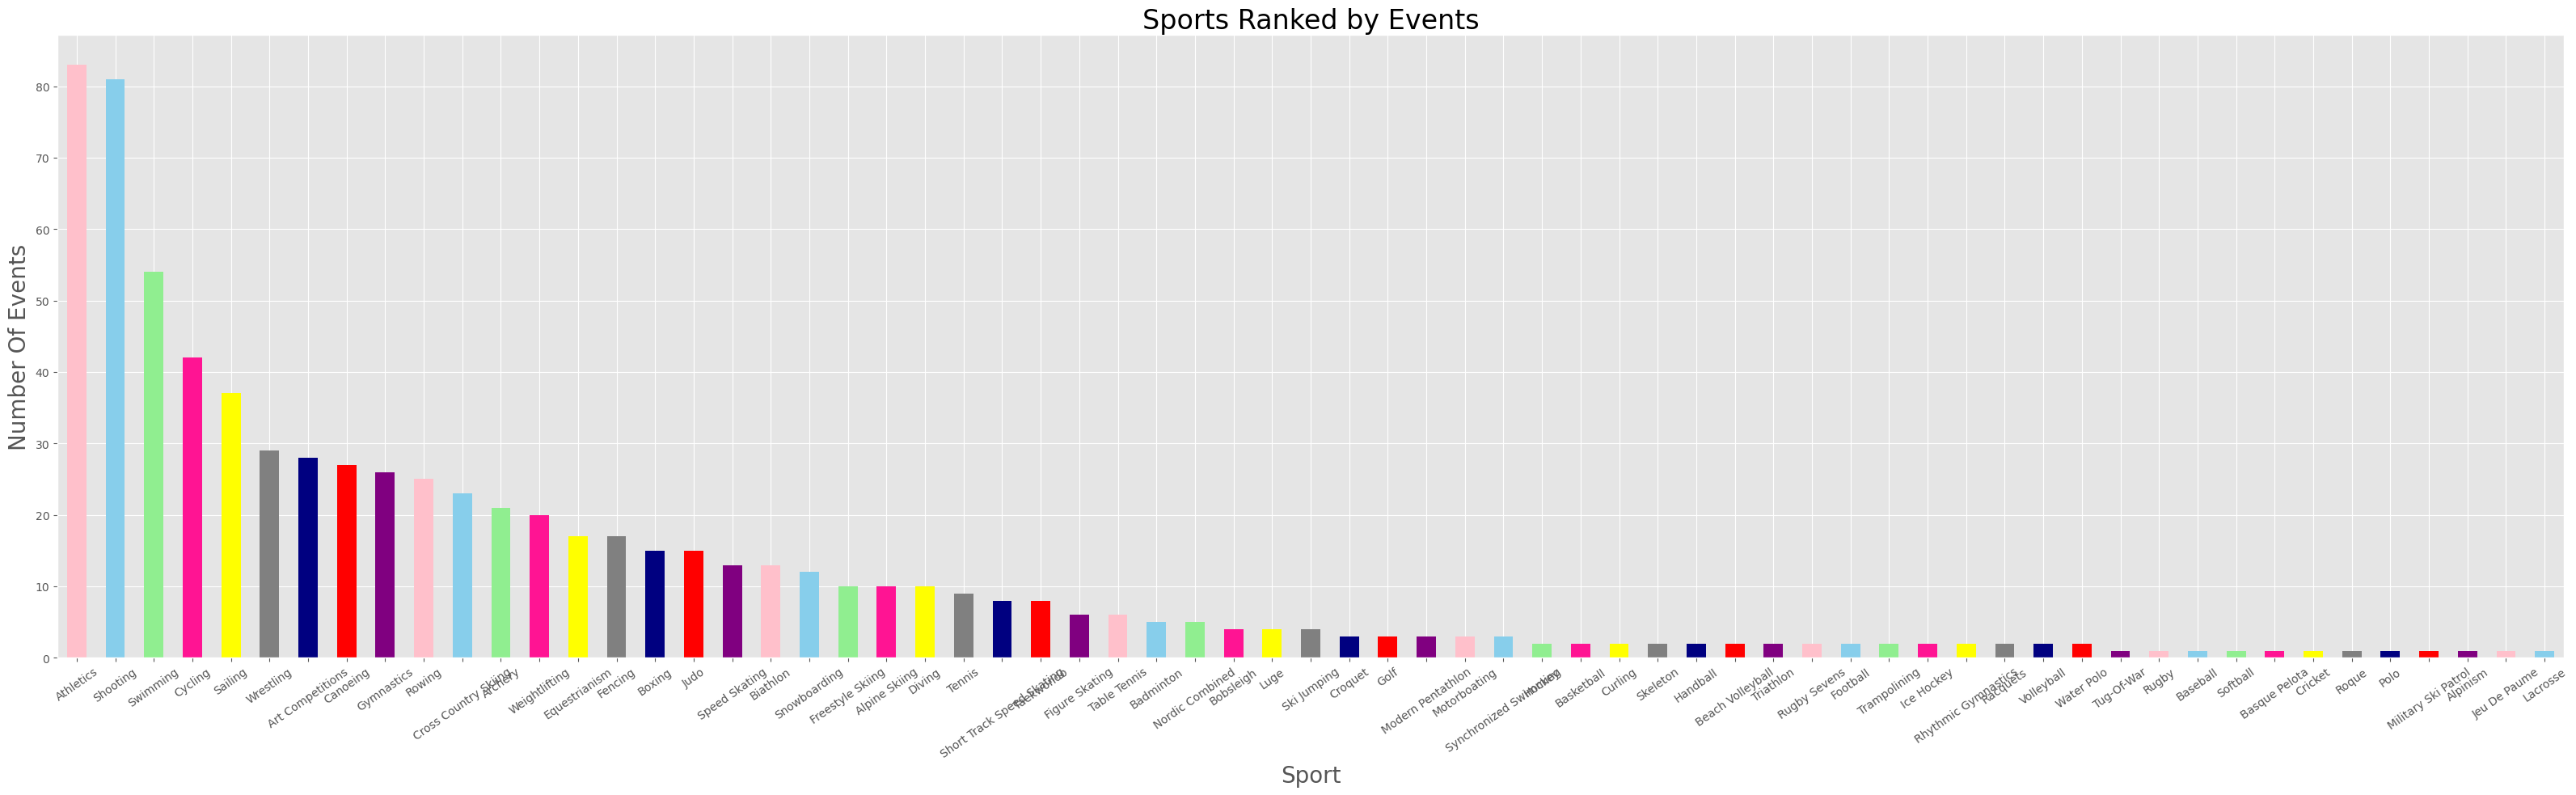

In [96]:
cols = ['pink', 'skyblue', 'lightgreen', 'deeppink', 'yellow', 'gray', 'navy', 'red', 'purple']
plt.figure(figsize = (40, 10))
unique_events.plot(kind = 'bar', color = cols)
plt.title('Sports Ranked by Events', fontsize = 24)
plt.xlabel('Sport', fontsize = 20)
plt.xticks(rotation = 35)
plt.ylabel('Number Of Events', fontsize = 20)
plt.show()

*analyzing total events per year*

In [103]:
total_events_per_year = df.groupby('year')['id'].nunique()
total_events_per_year.head(10)

year
1896      34
1900     433
1904     167
1906     203
1908     578
1912     609
1920     797
1924    1060
1928     990
1932     591
Name: id, dtype: int64

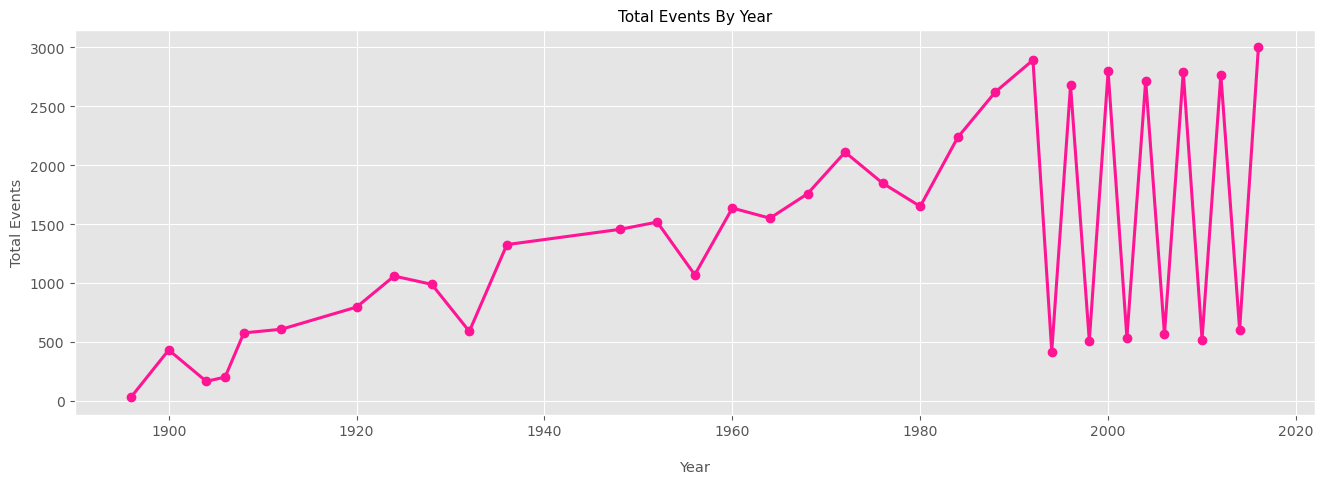

In [150]:
plt.figure(figsize = (16, 5))
total_events_per_year.plot(kind = 'line', marker = 'o', linewidth = 2.2, color = 'deeppink')
plt.title('Total Events By Year', fontsize = 11)
plt.xlabel('\nYear', fontsize = 10.5)
plt.ylabel('Total Events', fontsize = 10.5)
plt.show()

*analyzing average age of athletes by their teams*

In [125]:
avg_country_age = df.groupby('team')['age'].mean().sort_values(ascending = False)
avg_country_age.head()

team
Cincinnati Archers    68.0
Llanoria              59.0
Lett                  55.0
Oleander II           55.0
Bermudes              54.0
Name: age, dtype: float64

*analyzing age of athletes by season*

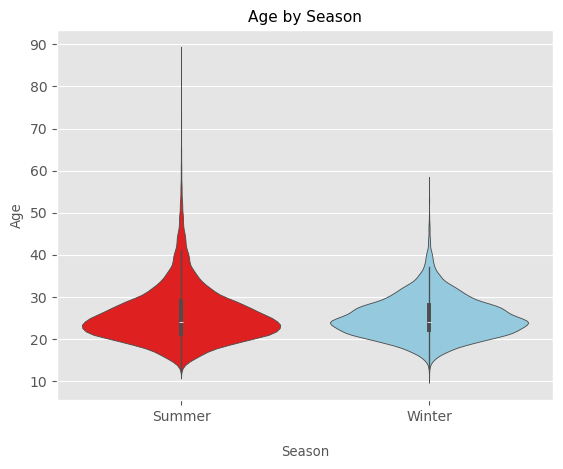

In [133]:
import warnings
warnings.filterwarnings('ignore')

sns.violinplot(x = 'season', y = 'age', data = df, palette = ['red', 'skyblue'])
plt.title('Age by Season', fontsize = 11)
plt.xlabel('\nSeason', fontsize = 9.5)
plt.ylabel('Age', fontsize = 9.5)
plt.show()

*analyzing health and weight in relation to **medals won***

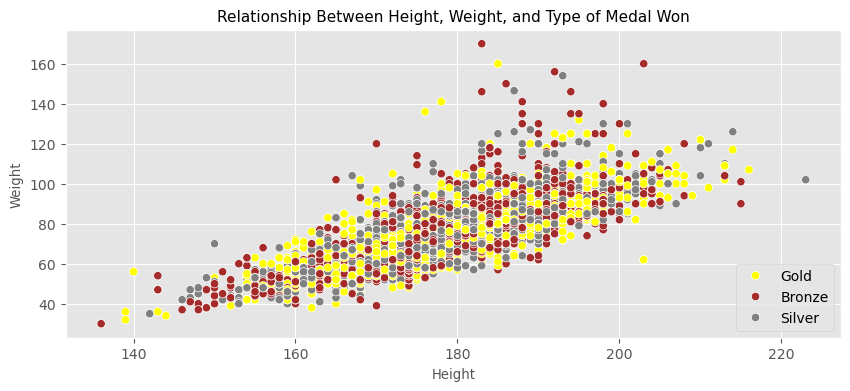

In [151]:
plt.figure(figsize = (10, 4))
sns.scatterplot(x = df['height'], y = df['weight'], hue = df['medal'], palette = ['yellow', 'brown', 'gray'])
plt.title('Relationship Between Height, Weight, and Type of Medal Won', fontsize = 11)
plt.xlabel('Height', fontsize = 9.5)
plt.ylabel('Weight', fontsize = 9.5)
plt.legend(loc = 'lower right')
plt.show()

*analyzing medals by country*

<Axes: xlabel='year', ylabel='city'>

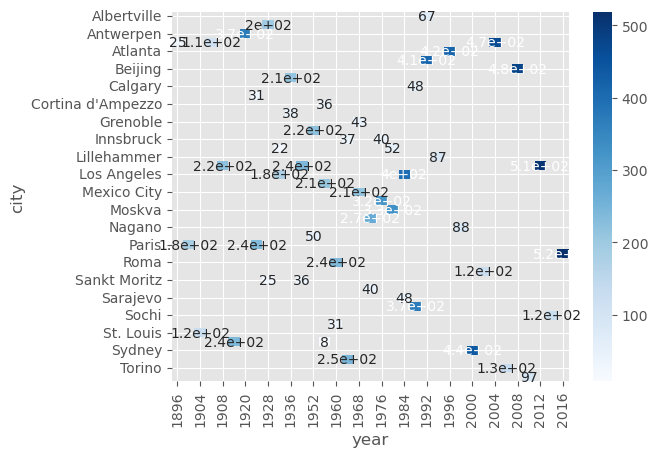

In [154]:
medals_country = df.pivot_table(index = 'city', columns = 'year', values = 'medal', aggfunc = 'count')
sns.heatmap(medals_country, cmap = 'Blues', annot = True)

In [137]:
df.dtypes

id          int64
name       object
sex        object
age       float64
height    float64
weight    float64
team       object
noc        object
games      object
year        int64
season     object
city       object
sport      object
event      object
medal      object
dtype: object

In [63]:
df.columns

Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')